## Code to plot matcups on a real-world map with interactive spectra plots

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

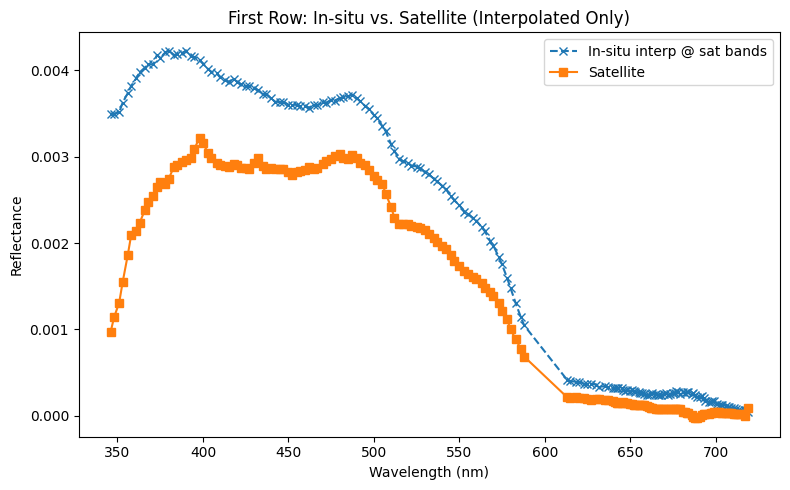

In [3]:

# 0) Define your path
path = "/home/jovyan/Hackweek/Project/SeaPACE/matchups_all.csv"

# 1) Read the CSV and grab the first matchup
df    = pd.read_csv(path)
first = df.iloc[0]

# 2) Get satellite wavelengths & values
sat_cols = [c for c in df.columns if c.startswith('sat_rrs')]
sat_wl   = np.array([float(c.replace('sat_rrs','')) for c in sat_cols])
sat_val  = first[sat_cols].astype(float).values

# 3) Get in-situ wavelengths & values (numeric column names)
insitu_cols = []
for c in df.columns:
    try:
        float(c)
        insitu_cols.append(c)
    except ValueError:
        continue

insitu_wl  = np.array([float(c) for c in insitu_cols])
insitu_val = first[insitu_cols].astype(float).values

# 4) Sort in-situ spectrum for interpolation
sort_idx          = np.argsort(insitu_wl)
insitu_wl_sorted  = insitu_wl[sort_idx]
insitu_val_sorted = insitu_val[sort_idx]

# 5) Interpolate in-situ at the satellite bands
insitu_interp = np.interp(sat_wl, insitu_wl_sorted, insitu_val_sorted)

# 6) Plot only the interpolated in-situ and the satellite data
plt.figure(figsize=(8,5))
plt.plot(sat_wl, insitu_interp, 'x--', label='In-situ interp @ sat bands')
plt.plot(sat_wl, sat_val,       's-', label='Satellite')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('First Row: In-situ vs. Satellite (Interpolated Only)')
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# — Step 1: Load your matchup CSV and prepare the time string —

# 1.1) Read in the CSV (adjust path as needed)
df = pd.read_csv(path)

# 1.2) Parse the in-situ field_datetime into a nice string for tooltips
df['DateTime_str'] = (
    pd.to_datetime(df['field_datetime'], utc=True)
      .dt.strftime('%Y-%m-%d %H:%M:%S')
)

# 1.3) (Optional) Quick check
print(df[['field_datetime','DateTime_str']].head())


        field_datetime         DateTime_str
0  2024-09-06 21:11:00  2024-09-06 21:11:00
1  2024-09-12 21:05:00  2024-09-12 21:05:00
2  2024-09-17 20:24:00  2024-09-17 20:24:00
3  2024-09-18 20:48:00  2024-09-18 20:48:00
4  2024-09-19 19:39:00  2024-09-19 19:39:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
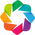

:Layout
   .Overlay.I    :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [merc_x,merc_y]   (DateTime_str,field_latitude,field_longitude)
   .DynamicMap.I :DynamicMap   []
      :Curve   [Wavelength]   (Reflectance)

In [10]:
import pandas as pd
import numpy as np
import holoviews as hv
from holoviews.element.tiles import CartoLight
from holoviews.streams import Selection1D
import math
import re

hv.extension('bokeh')

# -- 1) Load your matchup CSV
df = pd.read_csv(path)
df['DateTime_str'] = pd.to_datetime(df['field_datetime']).dt.strftime('%Y-%m-%d %H:%M:%S')

# -- 2) Convert lon/lat → Web Mercator coords
def lonlat_to_mercator(lon, lat):
    k = 6378137.0
    x = lon * (math.pi / 180.0) * k
    y = math.log(math.tan((90 + lat) * math.pi / 360.0)) * k
    return x, y

df['merc_x'], df['merc_y'] = zip(*[
    lonlat_to_mercator(lon, lat)
    for lon, lat in zip(df['field_longitude'], df['field_latitude'])
])

# -- 3) Build your base Points layer with Selection1D stream
points = hv.Points(
    df,
    kdims=['merc_x', 'merc_y'],
    vdims=['DateTime_str', 'field_latitude', 'field_longitude']
).opts(
    size=6, color='blue',
    tools=['tap', 'wheel_zoom', 'pan'],
    active_tools=['wheel_zoom'],
    hover_tooltips=[
        ('Time', '@DateTime_str'),
        ('Lat', '@field_latitude'),
        ('Lon', '@field_longitude')
    ]
)

selection = Selection1D(source=points)

# -- 4) Callback to build the spectrum plot for the selected index, with interpolation
def spectrum_for(index):
    if not index:
        return hv.Curve([], 'Wavelength', 'Reflectance').opts(title="Click a point to see its spectrum")

    idx = index[0]
    row = df.iloc[idx]

    # Satellite bands
    sat_cols = [c for c in df.columns if c.startswith('sat_rrs')]
    sat_wl    = np.array([float(c.replace('sat_rrs', '')) for c in sat_cols])
    sat_val   = row[sat_cols].astype(float).values

    # In-situ bands (numeric column names)
    insitu_cols = [c for c in df.columns if re.fullmatch(r'\d+(\.\d+)?', c)]
    insitu_wl    = np.array([float(c) for c in insitu_cols])
    insitu_val   = row[insitu_cols].astype(float).values

    # Sort and interpolate in-situ onto satellite wavelengths
    sort_idx          = np.argsort(insitu_wl)
    insitu_wl_sorted  = insitu_wl[sort_idx]
    insitu_val_sorted = insitu_val[sort_idx]
    insitu_interp     = np.interp(sat_wl, insitu_wl_sorted, insitu_val_sorted)

    # Plot curves
    c1 = hv.Curve((insitu_wl_sorted, insitu_val_sorted),  'Wavelength', 'Reflectance') \
           .opts(color='blue', legend_label='In-situ')
    c1_interp = hv.Curve((sat_wl, insitu_interp),         'Wavelength', 'Reflectance') \
                   .opts(color='cyan', legend_label='In-situ (interp)', line_dash='dashed')
    c2 = hv.Curve((sat_wl, sat_val),                       'Wavelength', 'Reflectance') \
           .opts(color='red', marker='o', legend_label='Satellite')

    return (c1 * c1_interp * c2).opts(
        width=600, height=350,
        title=f"Spectrum @ {row['DateTime_str']}",
        legend_position='top_left'
    )

spectrum_dmap = hv.DynamicMap(spectrum_for, streams=[selection])

# -- 5) Compose map + spectrum layout
tiles = CartoLight().opts(width=800, height=600, xaxis=None, yaxis=None)
map_overlay = tiles * points

layout = hv.Layout(map_overlay + spectrum_dmap).cols(1)

# Render
layout


In [11]:
df


,date,time,lat,lon,350,351,352,353,354,355,...,sat_rrs709,sat_rrs711,sat_rrs712,sat_rrs713,sat_rrs714,sat_rrs717,sat_rrs719,DateTime_str,merc_x,merc_y
0,20240906,21:11:00,34.2247,-119.6792,0.003501,0.003514,0.003513,0.003627,0.003683,0.003659,...,2.842929e-05,2.385809e-05,0.000026,0.000023,0.000024,-0.000003,0.000091,2024-09-06 21:11:00,-1.332263e+07,4.059014e+06
1,20240912,21:05:00,34.3685,-119.6358,0.004348,0.004402,0.004428,0.004514,0.004541,0.004538,...,2.280010e-04,2.190918e-04,0.000213,0.000208,0.000199,0.000164,0.000258,2024-09-12 21:05:00,-1.331780e+07,4.078391e+06
2,20240917,20:24:00,34.2610,-119.6197,0.004914,0.004915,0.004887,0.004971,0.004996,0.004988,...,3.920123e-05,3.740080e-05,0.000035,0.000037,0.000037,0.000023,0.000113,2024-09-17 20:24:00,-1.331600e+07,4.063902e+06
3,20240918,20:48:00,34.2994,-119.7580,0.003420,0.003421,0.003537,0.003656,0.003669,0.003632,...,7.727302e-05,7.418272e-05,0.000072,0.000073,0.000072,0.000054,0.000177,2024-09-18 20:48:00,-1.333140e+07,4.069075e+06
4,20240919,19:39:00,34.2861,-119.5197,0.003676,0.003727,0.003864,0.003843,0.003768,0.003819,...,-1.288826e-05,-1.088861e-05,-0.000010,-0.000016,-0.000015,-0.000020,0.000245,2024-09-19 19:39:00,-1.330487e+07,4.067283e+06
5,20240919,22:29:00,34.2774,-119.6750,0.003078,0.003167,0.003100,0.003109,0.003116,0.003110,...,-5.999878e-05,-5.759895e-05,-0.000050,-0.000043,-0.000032,-0.000003,0.000235,2024-09-19 22:29:00,-1.332216e+07,4.066111e+06
6,20240920,20:40:00,34.3619,-119.7190,0.003744,0.003724,0.003690,0.003790,0.003833,0.003803,...,6.680687e-07,-4.991889e-07,0.000002,0.000001,-0.000004,-0.000019,0.000120,2024-09-20 20:40:00,-1.332706e+07,4.077500e+06
7,20240925,21:56:00,34.1872,-119.6993,0.003192,0.003204,0.003250,0.003366,0.003443,0.003475,...,-5.399910e-05,-4.472651e-05,-0.000037,-0.000030,-0.000044,-0.000089,0.000176,2024-09-25 21:56:00,-1.332487e+07,4.053966e+06
8,20240926,20:22:00,34.3406,-119.6475,0.004130,0.004322,0.004447,0.004257,0.004062,0.004217,...,1.182012e-04,1.091998e-04,0.000107,0.000110,0.000107,0.000076,0.000136,2024-09-26 20:22:00,-1.331910e+07,4.074628e+06
